In [1]:
import os
import json
import requests
import numpy as np
from io import BytesIO
from IPython.display import display
from PIL import Image, ImageDraw, ImageFont

In [2]:
def draw(image_url, items):
    r = requests.get(image_url)
    im = Image.open(BytesIO(r.content))
    draw = ImageDraw.Draw(im)
    font = ImageFont.truetype('arial.ttf', 16, encoding='unic')
    for item in items:
        draw.rectangle([item['x'], 
                        item['y'], 
                        item['x'] + item['width'], 
                        item['y'] + item['height']], outline='#FF0000')
                        
        s = '{0} ({1:.0%})'.format(item['label'], item['confidence'])
        draw.text((item['x'], item['y']), 
                  s, 
                  font=font, fill=(255, 255, 255, 255))
    del draw
    return im

In [11]:
service = 'http://20.185.100.165:80/score'
image_url = 'https://i.pinimg.com/originals/60/3e/66/603e6638168e2656d50cc78a34a561ef.jpg'
#image_url = 'https://my100yearoldhome.com/wp-content/uploads/2017/04/Rae-Dunn-Pottery-Collection.jpg'
#image_url = 'https://thumbs.dreamstime.com/z/red-yellow-white-dishes-cups-shelves-store-dishes-display-99263287.jpg'
#image_url = 'https://media-cdn.tripadvisor.com/media/photo-s/06/91/aa/af/kingsbury-of-tahoe.jpg'


In [12]:
r = requests.post(service, json={'image': image_url, 'confidence': .2})
print(r)
response = r.json()

<Response [200]>


In [13]:
print(json.dumps(response, indent=4, sort_keys=True))

{
    "image": "https://i.pinimg.com/originals/60/3e/66/603e6638168e2656d50cc78a34a561ef.jpg",
    "predictions": [
        {
            "confidence": 0.9932388067245483,
            "height": 51.129798889160156,
            "label": "bowl",
            "width": 68.16522979736328,
            "x": 211.9068145751953,
            "y": 54.036415100097656
        },
        {
            "confidence": 0.9388572573661804,
            "height": 47.26300048828125,
            "label": "bowl",
            "width": 60.23414611816406,
            "x": 397.3574523925781,
            "y": 403.2862548828125
        },
        {
            "confidence": 0.9283175468444824,
            "height": 54.71501159667969,
            "label": "bowl",
            "width": 64.97950744628906,
            "x": 130.26217651367188,
            "y": 406.58612060546875
        },
        {
            "confidence": 0.8611916899681091,
            "height": 64.88946533203125,
            "label": "bowl",
          

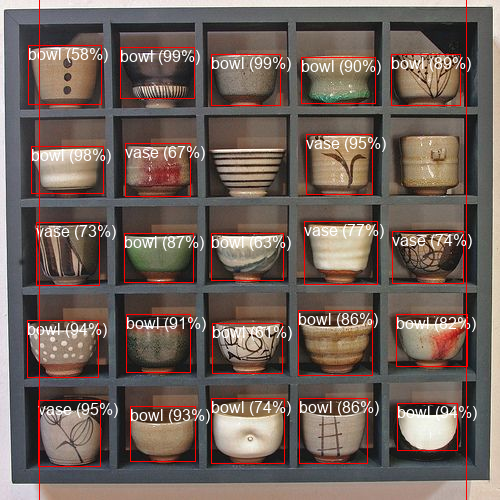

In [14]:
img = draw(image_url, response['predictions'])
display(img)